<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import pandas as pd
import json

In [3]:
with open('data/scraped_fines.json', 'r', encoding='utf-8') as f:
    all_fines = json.load(f)

In [4]:
ungrouped = all_fines['allItems']
fines = pd.json_normalize(ungrouped)

In [4]:
fines

,id,picture,name,price,authority,date,controller,articleViolated,type,source,summary
0,1,https://www.privacyaffairs.com/wp-content/uplo...,Poland,9380,Polish National Personal Data Protection Offic...,10/18/2019,Polish Mayor,Art. 28 GDPR,Non-compliance with lawful basis for data proc...,https://uodo.gov.pl/decyzje/ZSPU.421.3.2019,No data processing agreement has been conclude...
1,2,https://www.privacyaffairs.com/wp-content/uplo...,Romania,2500,Romanian National Supervisory Authority for Pe...,10/17/2019,UTTIS INDUSTRIES,"Art. 12 GDPR, Art. 13 GDPR, Art. 5 (1) c) GDPR...",Information obligation non-compliance,https://www.dataprotection.ro/?page=A_patra_am...,A controller was sanctioned because he had unl...
2,3,https://www.privacyaffairs.com/wp-content/uplo...,Spain,60000,Spanish Data Protection Authority (AEPD),10/16/2019,Xfera Moviles S.A.,"Art. 5 GDPR, Art. 6 GDPR",Non-compliance with lawful basis for data proc...,https://www.aepd.es/resoluciones/PS-00262-2019...,The company had unlawfully processed the perso...
3,4,https://www.privacyaffairs.com/wp-content/uplo...,Spain,8000,Spanish Data Protection Authority (AEPD),10/16/2019,Iberdrola Clientes,Art. 31 GDPR,Failure to cooperate with supervisory authority,https://www.aepd.es/resoluciones/PS-00304-2019...,Iberdrola Clientes violated Article 13 of the ...
4,5,https://www.privacyaffairs.com/wp-content/uplo...,Romania,150000,Romanian National Supervisory Authority for Pe...,10/09/2019,Raiffeisen Bank SA,Art. 32 GDPR,Failure to implement sufficient measures to en...,https://www.dataprotection.ro/?page=Comunicat_...,Raiffeisen Bank Romania did not observe the ne...
...,...,...,...,...,...,...,...,...,...,...,...
875,876,https://www.privacyaffairs.com/wp-content/uplo...,Spain,56000,Spanish Data Protection Authority (AEPD),09/14/2021,"Vodafone Espana, S.A.U.",Art. 6 (1) GDPR,Non-compliance with lawful basis for data proc...,,The Spanish DPNA (AEPD) has fined Vodafone Esp...
876,877,https://www.privacyaffairs.com/wp-content/uplo...,Spain,56000,Spanish Data Protection Authority (AEPD),09/14/2021,"Vodafone Espana, S.A.U.",Art. 6 (1) GDPR,Non-compliance with lawful basis for data proc...,,The Spanish DPA (also known as AEPD) fined Vo...
877,878,https://www.privacyaffairs.com/wp-content/uplo...,Spain,4000,Spanish Data Protection Authority (AEPD),09/16/2021,Frigorifica Botana S.L.,Art. 5 (1) c) GDPR,Failure to comply with data processing principles,,The Spanish DPA (also known as AEPD) has fined...
878,879,https://www.privacyaffairs.com/wp-content/uplo...,Spain,18000,Spanish Data Protection Authority (AEPD),09/20/2021,CEDICO,Art. 5 (1) f) GDPR,Failure to comply with data processing principles,,"The Spanish DPA (AEPD) has fined CEDICO, CENTR..."


In [5]:
text = pd.read_csv('data/gdpr_article_text.csv')

How are the fines distributed?

In [6]:
gdpr_raw %>%
  ggplot(aes(price + 1)) +
  geom_histogram(fill = "midnightblue", alpha = 0.7) +
  scale_x_log10(labels = scales::dollar_format(prefix = "€")) +
  labs(x = "GDPR fine (EUR)", y = "GDPR violations")

SyntaxError: invalid syntax (3412148551.py, line 1)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

KeyboardInterrupt: 

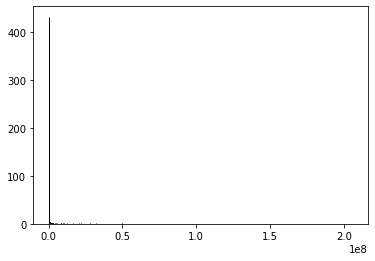

In [8]:
dist = sns.histplot(x='price', data=fines);
dist

In [8]:
dist;

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

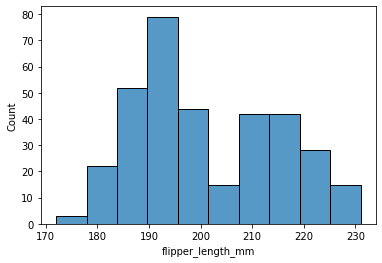

In [9]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm")

In [9]:
fines_nozero = fines.assign(price = lambda x: x.price+0.1)

/var/folders/_m/ywzv1wls03jf30rj9v4n6h2m0000gn/T/ipykernel_28200/1736858052.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


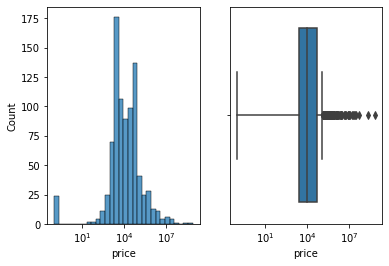

In [10]:
fig, ax = plt.subplots(1,2)
hp = sns.histplot(data=fines_nozero, x="price", bins=30, log_scale=(True, False), ax=ax[0]);
bp = sns.boxplot(data=fines_nozero, x="price", ax=ax[1]);

fig.axes[1].set_xscale('log')
fig.show()

gdpr_tidy <- gdpr_raw %>%
  transmute(id,
    price,
    country = name,
    article_violated,
    articles = str_extract_all(article_violated, "Art.[:digit:]+|Art. [:digit:]+")
  ) %>%
  mutate(total_articles = map_int(articles, length)) %>%
  unnest(articles) %>%
  add_count(articles) %>%
  filter(n > 10) %>%
  select(-n)

gdpr_tidy %>%
  mutate(
    articles = str_replace_all(articles, "Art. ", "Article "),
    articles = fct_reorder(articles, price)
  ) %>%
  ggplot(aes(articles, price + 1, color = articles, fill = articles)) +
  geom_boxplot(alpha = 0.2, outlier.colour = NA) +
  geom_quasirandom() +
  scale_y_log10(labels = scales::dollar_format(prefix = "€")) +
  labs(
    x = NULL, y = "GDPR fine (EUR)",
    title = "GDPR fines levied by article",
    subtitle = "For 250 violations in 25 countries"
  ) +
  theme(legend.position = "none")

In [53]:
fines_long = (
    fines
    .articleViolated.str.extractall(r'([Aa]rt. \d+(?=.*GDPR))')
    .reset_index()
    .rename(columns={'level_0':'id', 0:'article'})
    .assign(
        id = lambda x: x.id + 1,
        n_articles_violated = lambda x: (
            x
            .groupby('id')
            .match.transform('max')
            .astype('Int64') + 1
        ),
        article_number = lambda x: (
            x
            .article.str.extract(r'(\d+)')
            .astype('float')
            .astype('Int64')
        ),
        n_citations = lambda x: (
            x
            .groupby('article_number')
            .article_number.transform('count')
            .astype('Int64')
        )
    )
    .merge(fines, how='right', left_on='id', right_on='id')
    .loc[:, ['id', 'picture', 'name', 'price', 'authority', 'date',
             'controller','article', 'article_number','n_citations', 'n_articles_violated', 'type',
             'source', 'summary']]
    .loc[fines_long.n_citations >= 15]
)

In [ ]:

gdpr_tidy %>%
  mutate(
    articles = str_replace_all(articles, "Art. ", ""),
    articles = fct_reorder(articles, price)
  ) %>%
  ggplot(aes(articles, price + 1, color = articles, fill = articles)) +
  geom_boxplot(alpha = 0.2, outlier.colour = NA) +
  geom_quasirandom() +
  scale_y_log10(labels = scales::dollar_format(prefix = "€")) +
  labs(
    x = NULL, y = "GDPR fine (EUR)",
    title = "GDPR fines levied by article",
    subtitle = "For 250 violations in 25 countries"
  ) +
  theme(legend.position = "none")

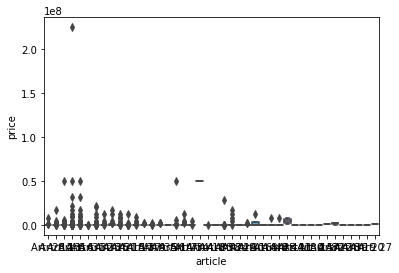

In [101]:
sns.boxplot(x='article',y = 'price', data=fines_long);

In [12]:
plt.rcParams["figure.figsize"]=20,20

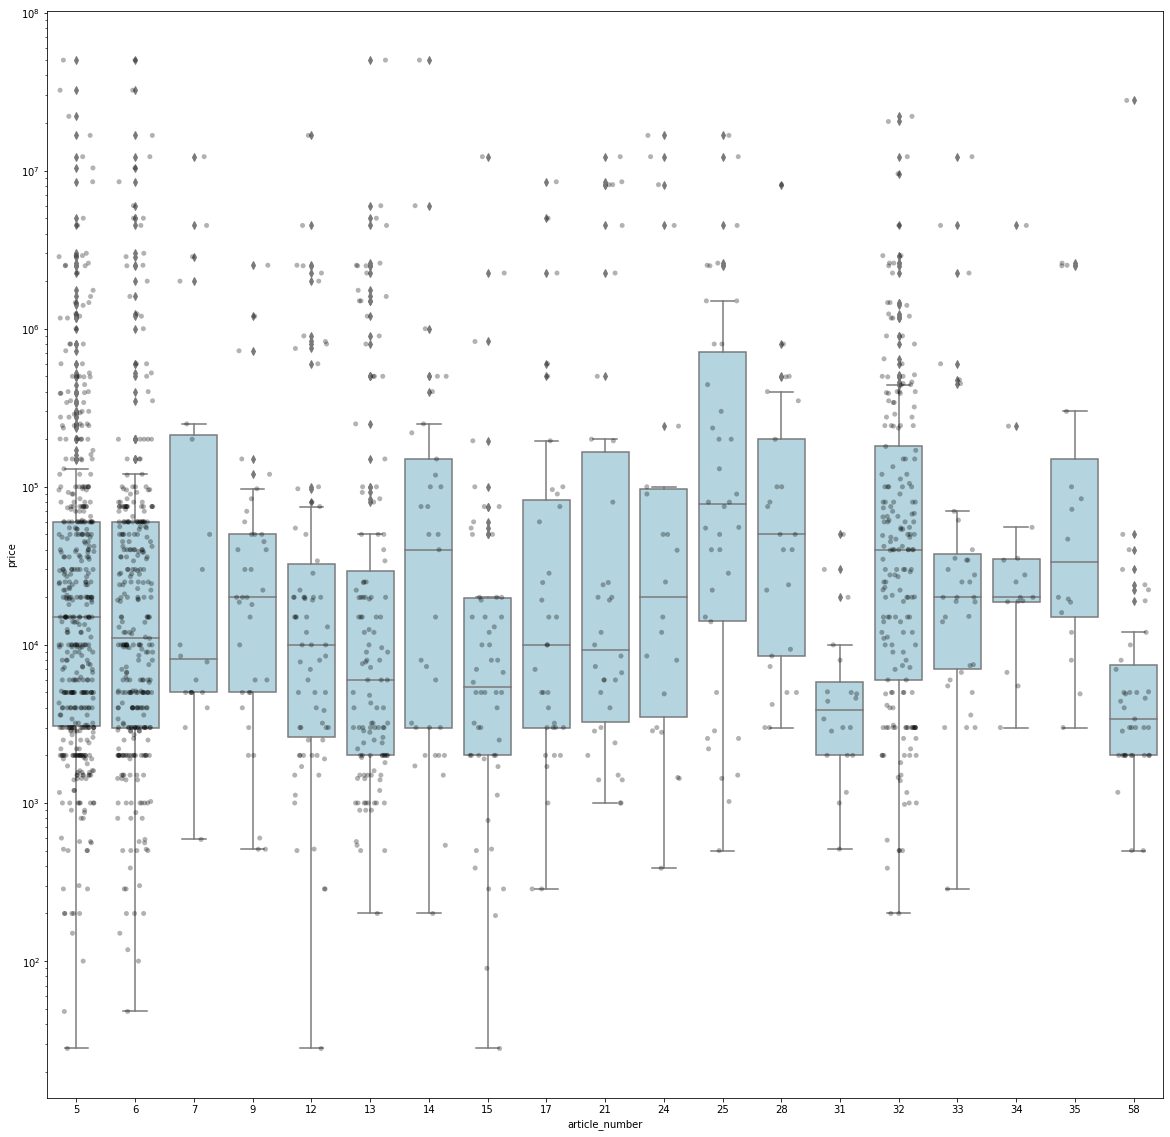

In [54]:
fig = (
    sns.boxplot(
        x='article_number',
        y='price',
        data=fines_long.query('price > 0.5').sort_values('article_number'),
        color='lightblue'
    ),
    sns.stripplot(
        x='article_number',
        y='price',
        data=fines_long.query('price > 0.5').sort_values('article_number'),
        color='black',
        jitter=0.3,
        alpha=0.3
    )
)

fig[0].axes.set_yscale('log')
fig[1].axes.set_yscale('log')

gdpr_violations <- gdpr_tidy %>%
  mutate(value = 1) %>%
  select(-article_violated) %>%
  pivot_wider(
    names_from = articles, values_from = value,
    values_fn = list(value = max), values_fill = list(value = 0)
  ) %>%
  janitor::clean_names()

gdpr_violations

In [57]:
fines_long

,id,picture,name,price,authority,date,controller,article,article_number,n_citations,n_articles_violated,type,source,summary
0,1,https://www.privacyaffairs.com/wp-content/uplo...,Poland,9380,Polish National Personal Data Protection Offic...,10/18/2019,Polish Mayor,Art. 28,28,26,1,Non-compliance with lawful basis for data proc...,https://uodo.gov.pl/decyzje/ZSPU.421.3.2019,No data processing agreement has been conclude...
1,2,https://www.privacyaffairs.com/wp-content/uplo...,Romania,2500,Romanian National Supervisory Authority for Pe...,10/17/2019,UTTIS INDUSTRIES,Art. 12,12,72,4,Information obligation non-compliance,https://www.dataprotection.ro/?page=A_patra_am...,A controller was sanctioned because he had unl...
2,2,https://www.privacyaffairs.com/wp-content/uplo...,Romania,2500,Romanian National Supervisory Authority for Pe...,10/17/2019,UTTIS INDUSTRIES,Art. 13,13,127,4,Information obligation non-compliance,https://www.dataprotection.ro/?page=A_patra_am...,A controller was sanctioned because he had unl...
3,2,https://www.privacyaffairs.com/wp-content/uplo...,Romania,2500,Romanian National Supervisory Authority for Pe...,10/17/2019,UTTIS INDUSTRIES,Art. 5,5,484,4,Information obligation non-compliance,https://www.dataprotection.ro/?page=A_patra_am...,A controller was sanctioned because he had unl...
4,2,https://www.privacyaffairs.com/wp-content/uplo...,Romania,2500,Romanian National Supervisory Authority for Pe...,10/17/2019,UTTIS INDUSTRIES,Art. 6,6,349,4,Information obligation non-compliance,https://www.dataprotection.ro/?page=A_patra_am...,A controller was sanctioned because he had unl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,876,https://www.privacyaffairs.com/wp-content/uplo...,Spain,56000,Spanish Data Protection Authority (AEPD),09/14/2021,"Vodafone Espana, S.A.U.",Art. 6,6,349,1,Non-compliance with lawful basis for data proc...,,The Spanish DPNA (AEPD) has fined Vodafone Esp...
1749,877,https://www.privacyaffairs.com/wp-content/uplo...,Spain,56000,Spanish Data Protection Authority (AEPD),09/14/2021,"Vodafone Espana, S.A.U.",Art. 6,6,349,1,Non-compliance with lawful basis for data proc...,,The Spanish DPA (also known as AEPD) fined Vo...
1750,878,https://www.privacyaffairs.com/wp-content/uplo...,Spain,4000,Spanish Data Protection Authority (AEPD),09/16/2021,Frigorifica Botana S.L.,Art. 5,5,484,1,Failure to comply with data processing principles,,The Spanish DPA (also known as AEPD) has fined...
1751,879,https://www.privacyaffairs.com/wp-content/uplo...,Spain,18000,Spanish Data Protection Authority (AEPD),09/20/2021,CEDICO,Art. 5,5,484,1,Failure to comply with data processing principles,,"The Spanish DPA (AEPD) has fined CEDICO, CENTR..."


In [58]:
fines

,id,picture,name,price,authority,date,controller,articleViolated,type,source,summary
0,1,https://www.privacyaffairs.com/wp-content/uplo...,Poland,9380,Polish National Personal Data Protection Offic...,10/18/2019,Polish Mayor,Art. 28 GDPR,Non-compliance with lawful basis for data proc...,https://uodo.gov.pl/decyzje/ZSPU.421.3.2019,No data processing agreement has been conclude...
1,2,https://www.privacyaffairs.com/wp-content/uplo...,Romania,2500,Romanian National Supervisory Authority for Pe...,10/17/2019,UTTIS INDUSTRIES,"Art. 12 GDPR, Art. 13 GDPR, Art. 5 (1) c) GDPR...",Information obligation non-compliance,https://www.dataprotection.ro/?page=A_patra_am...,A controller was sanctioned because he had unl...
2,3,https://www.privacyaffairs.com/wp-content/uplo...,Spain,60000,Spanish Data Protection Authority (AEPD),10/16/2019,Xfera Moviles S.A.,"Art. 5 GDPR, Art. 6 GDPR",Non-compliance with lawful basis for data proc...,https://www.aepd.es/resoluciones/PS-00262-2019...,The company had unlawfully processed the perso...
3,4,https://www.privacyaffairs.com/wp-content/uplo...,Spain,8000,Spanish Data Protection Authority (AEPD),10/16/2019,Iberdrola Clientes,Art. 31 GDPR,Failure to cooperate with supervisory authority,https://www.aepd.es/resoluciones/PS-00304-2019...,Iberdrola Clientes violated Article 13 of the ...
4,5,https://www.privacyaffairs.com/wp-content/uplo...,Romania,150000,Romanian National Supervisory Authority for Pe...,10/09/2019,Raiffeisen Bank SA,Art. 32 GDPR,Failure to implement sufficient measures to en...,https://www.dataprotection.ro/?page=Comunicat_...,Raiffeisen Bank Romania did not observe the ne...
...,...,...,...,...,...,...,...,...,...,...,...
875,876,https://www.privacyaffairs.com/wp-content/uplo...,Spain,56000,Spanish Data Protection Authority (AEPD),09/14/2021,"Vodafone Espana, S.A.U.",Art. 6 (1) GDPR,Non-compliance with lawful basis for data proc...,,The Spanish DPNA (AEPD) has fined Vodafone Esp...
876,877,https://www.privacyaffairs.com/wp-content/uplo...,Spain,56000,Spanish Data Protection Authority (AEPD),09/14/2021,"Vodafone Espana, S.A.U.",Art. 6 (1) GDPR,Non-compliance with lawful basis for data proc...,,The Spanish DPA (also known as AEPD) fined Vo...
877,878,https://www.privacyaffairs.com/wp-content/uplo...,Spain,4000,Spanish Data Protection Authority (AEPD),09/16/2021,Frigorifica Botana S.L.,Art. 5 (1) c) GDPR,Failure to comply with data processing principles,,The Spanish DPA (also known as AEPD) has fined...
878,879,https://www.privacyaffairs.com/wp-content/uplo...,Spain,18000,Spanish Data Protection Authority (AEPD),09/20/2021,CEDICO,Art. 5 (1) f) GDPR,Failure to comply with data processing principles,,"The Spanish DPA (AEPD) has fined CEDICO, CENTR..."
